In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import datetime as dt
%matplotlib inline

In [3]:
'''
Importing the text file which contains the chat of the group
in read mode using utf-8 encoding!
This is my clg group chat,it contains chats from 2018,so its a very big
file,will preview it after we've done adding regular expressions!

'''

f = open('WhatsApp Chat with CS-IT unofficial 3rd Year.txt','r',encoding='utf-8')

data = f.read()



In [36]:
dummy = data.split('\n')
K = 5
strt_idx = (len(dummy) // 2) - (K // 2)
end_idx = (len(dummy)) + (K // 2)
res = []
for idx in range(len(dummy)):
      
    # checking for elements in range
    if idx >= strt_idx and idx <= end_idx:
        print(dummy[idx])
  
# printing result 


05/07/2021, 18:53 - Vaibhav: Agar kal possible nhi h toh
05/07/2021, 18:55 - Saket: Kal 2 baje kr skte?
05/07/2021, 18:55 - Saket: 2 pm ya 7 pm kal?
05/07/2021, 18:55 - +91 82395 40152: 7pm
05/07/2021, 18:56 - Vaibhav: 7pm
05/07/2021, 18:56 - +91 89482 99878: 2pm
05/07/2021, 18:56 - Shashank Shekhar: 7pm
05/07/2021, 18:56 - Vaibhav: Kal jis grp ka viva h
05/07/2021, 18:56 - Vaibhav: Wo tension m rahega
05/07/2021, 18:56 - Vaibhav: Ishliye
05/07/2021, 18:56 - Vaibhav: 7 baje better h
05/07/2021, 18:57 - Vaibhav: Waise sab bata do apna apna..  Majority se decide hoga
05/07/2021, 18:58 - +91 74938 13225: Or deadline bhi toh hai OS ka
05/07/2021, 18:58 - +91 74938 13225: 5 bje tak
05/07/2021, 18:58 - +91 89482 99878: haa ye baat sahi hai...viva hai to 7 bje wala sahi rahega
05/07/2021, 18:58 - Saket: Wed and thursday ko shaam mai possible nahi hai
05/07/2021, 18:58 - +91 74938 13225: 7 bje free hokr dega saab accha rhega
05/07/2021, 18:59 - Vaibhav: 7 baje final kar do @919473405084 ..
05/

In [5]:
'''
Example for dry run : '16/08/18, 20:09 - '

\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s-\s

the first part "d{1,2}" this means here we can have one or 2 digits
then after we have "/"
then after we have "d{1,2}" again,same we can have one or 2 digits
then after we have "/"
then after we have "d{2,4}" here we check for 2 or more digits
then we have a space represented as "\s"
then we have hour representation it can take either one or 2 digits 
then we have a seperator ":" 
and the pattern repeats so on..

'''

# username and message in different col

pattern = '\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s-\s'
messages = re.split(pattern,data)[1:]
print(len(messages))

## extracting dates as well in different col

dates = re.findall(pattern,data)
print(len(dates))

6628
6628


In [6]:
# this is a simple time string,we will appply this kind of transformation
# inorder to get the date and the time for our analysis

string = '16/08/18, 20:09 - '
string = string.split(',')
date,time = string[0],string[1]
time = time.split('-')
time = time[0].strip()
print(date+" and "+time)

16/08/18 and 20:09


In [7]:
# this function is to seperate the time and date

def gettimeanddate(string):
    string = string.split(',')
    date,time = string[0],string[1]
    time = time.split('-')
    time = time[0].strip()
    
    return date+" "+time




In [8]:
# creating a dataframe for messages and their dates

df = pd.DataFrame({'user_messages':messages,
                   'message_date':dates})

df['message_date'] = df['message_date'].apply(lambda text:gettimeanddate(text))
df.rename(columns={'message_date':'date'},inplace=True)

df.head()

,user_messages,date
0,Messages and calls are end-to-end encrypted. N...,15/01/2020 09:59
1,"Vaibhav created group ""CS-IT 2k19 batch""\n",15/01/2020 09:15
2,You joined using this group's invite link\n,15/01/2020 09:59
3,+91 94700 87632 added +91 60061 15199\n,15/01/2020 10:00
4,Shashank Shekhar joined using this group's inv...,15/01/2020 10:01


In [9]:
df['user_messages']

0       Messages and calls are end-to-end encrypted. N...
1              Vaibhav created group "CS-IT 2k19 batch"\n
2             You joined using this group's invite link\n
3                 +91 94700 87632 added +91 60061 15199\n
4       Shashank Shekhar joined using this group's inv...
                              ...                        
6623                                           Saket: 👍\n
6624                                    Krisna Raja: +3\n
6625                                +91 79799 18403: +1\n
6626                                Rahul Singh Cse: +1\n
6627                                +91 89360 29948: +1\n
Name: user_messages, Length: 6628, dtype: object

In [10]:
'''
if we observe the usermessage,we find that the 
username is attached with the user message,so i need to get rid
of this,for that i will use the concept of the regular expression

sample of the regular expression output

['', 'Chinmayee', 'Hello this is official grup\n']

so here we can see that the username is at index 1 and message is at index2

sometimes it happens that we get the group notification,so 
for that case we have to handle it accordingly!


 Chinmayee: Hello this is official grup
 
 Chinmayee added you\n-->['Chinmayee added you','\n']

'''

users = []
messages = []

for message in df['user_messages']:
    
    entry = re.split('([\w\W]+?):\s', message)
    if entry[1:]:
        users.append(entry[1])
        messages.append(entry[2])

        
    else:
        users.append('Group Notification')
        messages.append(entry[0])
        
        
df['User'] = users
df['message'] = messages


def getstring(text):
    return text.split('\n')[0]

df['message'] = df['message'].apply(lambda text:getstring(text))


df = df.drop(['user_messages'],axis=1)
df = df[['message','date','User']]

df = df.rename(columns={'message':'Message',
                       'date':'Date'})



df.head()

,Message,Date,User
0,Messages and calls are end-to-end encrypted. N...,15/01/2020 09:59,Group Notification
1,"Vaibhav created group ""CS-IT 2k19 batch""",15/01/2020 09:15,Group Notification
2,You joined using this group's invite link,15/01/2020 09:59,Group Notification
3,+91 94700 87632 added +91 60061 15199,15/01/2020 10:00,Group Notification
4,Shashank Shekhar joined using this group's inv...,15/01/2020 10:01,Group Notification


In [12]:
# 16/08/18 20:09
    
# YYYY-MM-DD

In [13]:
df.shape

(6628, 3)

In [14]:
df['Only date'] = pd.to_datetime(df['Date']).dt.date

df['Year'] = pd.to_datetime(df['Date']).dt.year

df['Month_num'] = pd.to_datetime(df['Date']).dt.month

df['Month'] = pd.to_datetime(df['Date']).dt.month_name()

df['Day'] = pd.to_datetime(df['Date']).dt.day

df['Day_name'] = pd.to_datetime(df['Date']).dt.day_name()


df['Hour'] = pd.to_datetime(df['Date']).dt.hour

df['Minute'] = pd.to_datetime(df['Date']).dt.minute


df.head()

,Message,Date,User,Only date,Year,Month_num,Month,Day,Day_name,Hour,Minute
0,Messages and calls are end-to-end encrypted. N...,15/01/2020 09:59,Group Notification,2020-01-15,2020,1,January,15,Wednesday,9,59
1,"Vaibhav created group ""CS-IT 2k19 batch""",15/01/2020 09:15,Group Notification,2020-01-15,2020,1,January,15,Wednesday,9,15
2,You joined using this group's invite link,15/01/2020 09:59,Group Notification,2020-01-15,2020,1,January,15,Wednesday,9,59
3,+91 94700 87632 added +91 60061 15199,15/01/2020 10:00,Group Notification,2020-01-15,2020,1,January,15,Wednesday,10,0
4,Shashank Shekhar joined using this group's inv...,15/01/2020 10:01,Group Notification,2020-01-15,2020,1,January,15,Wednesday,10,1


In [15]:
df[df['User'] == 'Jagss']

,Message,Date,User,Only date,Year,Month_num,Month,Day,Day_name,Hour,Minute


In [16]:
words = []
for message in df['Message']:
    words.extend(message.split())
    
print(len(words))

36932


In [17]:
words

['Messages',
 'and',
 'calls',
 'are',
 'end-to-end',
 'encrypted.',
 'No',
 'one',
 'outside',
 'of',
 'this',
 'chat,',
 'not',
 'even',
 'WhatsApp,',
 'can',
 'read',
 'or',
 'listen',
 'to',
 'them.',
 'Tap',
 'to',
 'learn',
 'more.',
 'Vaibhav',
 'created',
 'group',
 '"CS-IT',
 '2k19',
 'batch"',
 'You',
 'joined',
 'using',
 'this',
 "group's",
 'invite',
 'link',
 '+91',
 '94700',
 '87632',
 'added',
 '+91',
 '60061',
 '15199',
 'Shashank',
 'Shekhar',
 'joined',
 'using',
 'this',
 "group's",
 'invite',
 'link',
 '+91',
 '87892',
 '39405',
 'joined',
 'using',
 'this',
 "group's",
 'invite',
 'link',
 'Rajkeshav',
 'Bit',
 'joined',
 'using',
 'this',
 "group's",
 'invite',
 'link',
 '+91',
 '93349',
 '98377',
 'joined',
 'using',
 'this',
 "group's",
 'invite',
 'link',
 '+91',
 '82104',
 '36246',
 'joined',
 'using',
 'this',
 "group's",
 'invite',
 'link',
 '+91',
 '91550',
 '81390',
 'joined',
 'using',
 'this',
 "group's",
 'invite',
 'link',
 '+91',
 '82104',
 '36246',


In [18]:
df[(df['Message'] == '<Media omitted>')&(df['User'] == 'Jagss')].shape

(0, 11)

In [19]:
df['Message'].unique()

array(['Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.',
       'Vaibhav created group "CS-IT 2k19 batch"',
       "You joined using this group's invite link", ..., '🖐🏼', '🤚🏻', '+2'],
      dtype=object)

In [20]:
df[df['Message']=='<Media omitted>']

,Message,Date,User,Only date,Year,Month_num,Month,Day,Day_name,Hour,Minute
75,<Media omitted>,18/01/2020 10:00,Tushar Raj,2020-01-18,2020,1,January,18,Saturday,10,0
80,<Media omitted>,22/01/2020 20:43,+91 94701 86450,2020-01-22,2020,1,January,22,Wednesday,20,43
85,<Media omitted>,26/01/2020 01:35,+91 87892 39405,2020-01-26,2020,1,January,26,Sunday,1,35
106,<Media omitted>,29/01/2020 18:41,+91 90793 54210,2020-01-29,2020,1,January,29,Wednesday,18,41
108,<Media omitted>,02/02/2020 13:15,+91 94701 86450,2020-02-02,2020,2,February,2,Sunday,13,15
...,...,...,...,...,...,...,...,...,...,...,...
6584,<Media omitted>,12/04/2022 14:06,Tushar Raj,2022-12-04,2022,12,December,4,Sunday,14,6
6585,<Media omitted>,12/04/2022 14:06,Tushar Raj,2022-12-04,2022,12,December,4,Sunday,14,6
6586,<Media omitted>,12/04/2022 14:06,Tushar Raj,2022-12-04,2022,12,December,4,Sunday,14,6
6587,<Media omitted>,12/04/2022 14:06,Tushar Raj,2022-12-04,2022,12,December,4,Sunday,14,6


In [21]:
df['User'].value_counts().head()

Vaibhav               1379
Shreya                 572
Group Notification     458
+91 79703 41458        259
Ansh Raj               239
Name: User, dtype: int64

([0, 1, 2, 3, 4],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

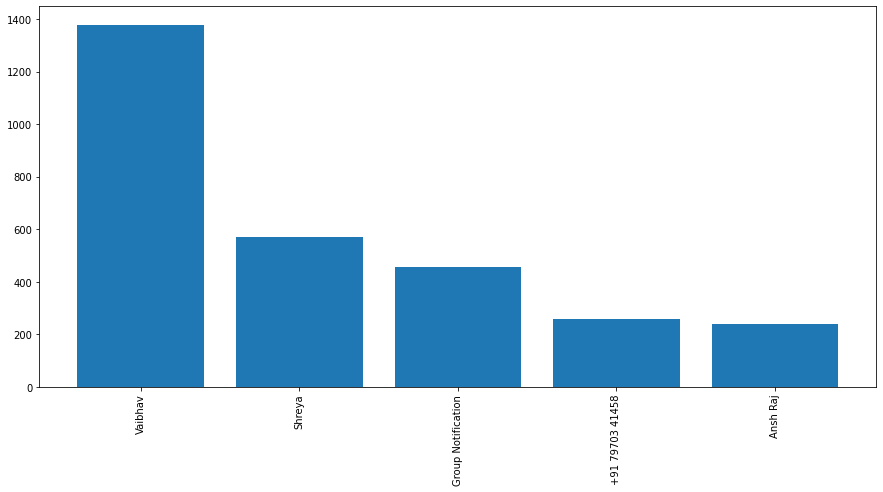

In [22]:
counts = df['User'].value_counts().head()
plt.figure(figsize=(15,7))
plt.bar(counts.index,counts.values)
plt.xticks(rotation = 'vertical')


In [23]:
# computationally heavy

wordmap = {}
for message in df['Message']:
    dummy = message.split()
    for word in dummy:
        if word in wordmap:
            wordmap[word]+=1
            
        else:
            wordmap[word] = 1
            
            
wordmap = dict(sorted(wordmap.items(),key = lambda x:x[1],reverse = True))

wordmap

{'<Media': 780,
 'omitted>': 780,
 'to': 742,
 'hai': 451,
 'ka': 399,
 'with': 380,
 'code': 361,
 'h': 359,
 'Tap': 345,
 'learn': 344,
 'security': 344,
 'more.': 343,
 'Your': 343,
 'changed.': 342,
 'was': 318,
 'message': 316,
 'This': 313,
 'deleted': 307,
 'the': 305,
 '+91': 283,
 'ko': 257,
 '+1': 254,
 'class': 231,
 'bhi': 224,
 'nhi': 224,
 'hi': 223,
 'sir': 217,
 'se': 213,
 'ho': 209,
 'and': 189,
 'for': 188,
 'me': 174,
 'hoga': 172,
 'toh': 172,
 'nahi': 167,
 'this': 140,
 'Ok': 135,
 'join': 133,
 'bhai': 130,
 'is': 129,
 'of': 120,
 'will': 119,
 'baat': 118,
 'ki': 117,
 'kar': 116,
 'in': 115,
 'ke': 115,
 'koi': 113,
 'k': 111,
 'log': 106,
 'kr': 106,
 'Sir': 104,
 'quiz': 104,
 'do': 103,
 'be': 99,
 'na': 99,
 'm': 95,
 'lab': 88,
 'it': 87,
 'link': 86,
 'wo': 83,
 'aur': 83,
 'kya': 82,
 'ek': 82,
 'viva': 82,
 'ye': 79,
 'a': 78,
 'sab': 76,
 '2': 74,
 '1': 74,
 'bol': 73,
 'liye': 72,
 'kuch': 71,
 'abhi': 70,
 'karna': 69,
 'time': 69,
 'joined': 68,
 

In [24]:
# top 20 words used in the whatsapp group

from collections import Counter
words = []
for message in df['Message']:
    words.extend(message.split())
    
wordmap = dict(Counter(words).most_common(20))
wordmap = dict(sorted(wordmap.items(),key=lambda x:x[1],reverse=True))
newdf = pd.DataFrame(wordmap.items())
newdf

,0,1
0,<Media,780
1,omitted>,780
2,to,742
3,hai,451
4,ka,399
5,with,380
6,code,361
7,h,359
8,Tap,345
9,learn,344


In [26]:
# a,an,the,you,ok,...

In [30]:
temp = df[(df['User']!='Group Notification') | (df['User']!='<Media omitted>')]
temp

,Message,Date,User,Only date,Year,Month_num,Month,Day,Day_name,Hour,Minute
0,Messages and calls are end-to-end encrypted. N...,15/01/2020 09:59,Group Notification,2020-01-15,2020,1,January,15,Wednesday,9,59
1,"Vaibhav created group ""CS-IT 2k19 batch""",15/01/2020 09:15,Group Notification,2020-01-15,2020,1,January,15,Wednesday,9,15
2,You joined using this group's invite link,15/01/2020 09:59,Group Notification,2020-01-15,2020,1,January,15,Wednesday,9,59
3,+91 94700 87632 added +91 60061 15199,15/01/2020 10:00,Group Notification,2020-01-15,2020,1,January,15,Wednesday,10,0
4,Shashank Shekhar joined using this group's inv...,15/01/2020 10:01,Group Notification,2020-01-15,2020,1,January,15,Wednesday,10,1
...,...,...,...,...,...,...,...,...,...,...,...
6623,👍,13/04/2022 20:27,Saket,2022-04-13,2022,4,April,13,Wednesday,20,27
6624,+3,13/04/2022 20:28,Krisna Raja,2022-04-13,2022,4,April,13,Wednesday,20,28
6625,+1,13/04/2022 20:44,+91 79799 18403,2022-04-13,2022,4,April,13,Wednesday,20,44
6626,+1,13/04/2022 20:45,Rahul Singh Cse,2022-04-13,2022,4,April,13,Wednesday,20,45


In [1]:
def gettopwords(selecteduser,df):

    # getting the stopwords

    file = open('stop_hinglish.txt','r')
    stopwords = file.read()
    stopwords = stopwords.split('\n')
    
    if selecteduser!='Overall':
        df = df[df['User']==selecteduser]
        
    temp = df[(df['User']!='Group Notification') |
             (df['User']!='<Media omitted>')]
    
    words = []
    
    for message in df['Message']:
        for word in message.lower().split():
            if word not in stopwords:
                words.append(word)
                
    
    mostcommon = pd.DataFrame(Counter(words).most_common(20))
    return mostcommon



mostcommon = gettopwords('Overall',df)

mostcommon


NameError: name 'df' is not defined

In [ ]:
import emoji

In [ ]:
def emojihelp(selecteduser,df):
    
    if selecteduser!='Overall':
        df = df[df['User']==selecteduser]
        
    emojis = []
    for message in df['Message']:
        emojis.extend([c for c in message if c in emoji.UNICODE_EMOJI['en']])
        
    
    emojidf = pd.DataFrame(Counter(emojis).most_common(len(Counter(emojis))))
    
    return emojidf


dfmoji = emojihelp('Overall',df)
dfmoji

,0,1
0,✋,183
1,🏻,88
2,😂,41
3,👍,39
4,👆,38
...,...,...
69,✨,1
70,🔝,1
71,🙌,1
72,🤟,1


In [ ]:
dfmoji.columns = ['Emoji','Count']
dfmoji

,Emoji,Count
0,✋,183
1,🏻,88
2,😂,41
3,👍,39
4,👆,38
...,...,...
69,✨,1
70,🔝,1
71,🙌,1
72,🤟,1


In [ ]:
df.head()

,Message,Date,User,Only date,Year,Month_num,Month,Day,Day_name,Hour,Minute
0,Messages and calls are end-to-end encrypted. N...,16/08/18 20:09,Group Notification,2018-08-16,2018,8,August,16,Thursday,20,9
1,"Chinmayee created group ""AGI OFFICIAL@IT 2018-22""",16/08/18 20:09,Group Notification,2018-08-16,2018,8,August,16,Thursday,20,9
2,Chinmayee added you,16/08/18 20:09,Group Notification,2018-08-16,2018,8,August,16,Thursday,20,9
3,Hello this is official grup,16/08/18 20:09,Chinmayee,2018-08-16,2018,8,August,16,Thursday,20,9
4,Chusinam leaaa,16/08/18 20:10,Jagss,2018-08-16,2018,8,August,16,Thursday,20,10


In [ ]:
'''
We want the count of messages month-wise,
so we will apply group by and then by 
adding reset_index() we will get the 
result in a dataframe format

then we will add the "Year and month columns" 
like "January-2018",so that to analyze the things become simple

'''


def monthtimeline(selecteduser,df):


    temp = df.groupby(['Year','Month_num','Month']).count()['Message'].reset_index().sort_values(['Message'])
    
    time = []
    for i in range(temp.shape[0]):
        time.append(temp['Month'][i]+"-"+str(temp['Year'][i]))
        
    temp['Time'] = time
    
    return temp

,Year,Month_num,Month,Message
0,2018,1,January,47
1,2018,2,February,35
2,2018,3,March,78
3,2018,4,April,66
4,2018,5,May,29
5,2018,6,June,25
6,2018,7,July,47
7,2018,8,August,520
8,2018,9,September,264
9,2018,10,October,208


In [ ]:
df.head()

,Message,Date,User,Only date,Year,Month_num,Month,Day,Day_name,Hour,Minute
0,Messages and calls are end-to-end encrypted. N...,16/08/18 20:09,Group Notification,2018-08-16,2018,8,August,16,Thursday,20,9
1,"Chinmayee created group ""AGI OFFICIAL@IT 2018-22""",16/08/18 20:09,Group Notification,2018-08-16,2018,8,August,16,Thursday,20,9
2,Chinmayee added you,16/08/18 20:09,Group Notification,2018-08-16,2018,8,August,16,Thursday,20,9
3,Hello this is official grup,16/08/18 20:09,Chinmayee,2018-08-16,2018,8,August,16,Thursday,20,9
4,Chusinam leaaa,16/08/18 20:10,Jagss,2018-08-16,2018,8,August,16,Thursday,20,10


In [ ]:
1,2,2,3,4,4,4,5,6,7,3,4


1| 2 2 | 3 3| 4 4 4 4 | 5 | 6 | 7

{4 : 4, 3:2 , 2:2,} 

In [ ]:
temp = df.groupby(['Year','Month_num','Month']).count()['Message'].reset_index()
temp

,Year,Month_num,Month,Message
0,2018,1,January,47
1,2018,2,February,35
2,2018,3,March,78
3,2018,4,April,66
4,2018,5,May,29
5,2018,6,June,25
6,2018,7,July,47
7,2018,8,August,520
8,2018,9,September,264
9,2018,10,October,208


In [ ]:
temp = df.groupby(['Year','Month_num','Month']).count()['Message'].reset_index()
temp

,Year,Month_num,Month,Message
0,2018,1,January,47
1,2018,2,February,35
2,2018,3,March,78
3,2018,4,April,66
4,2018,5,May,29
5,2018,6,June,25
6,2018,7,July,47
7,2018,8,August,520
8,2018,9,September,264
9,2018,10,October,208


In [ ]:
temp.shape

(48, 4)

In [ ]:
str(temp['Month'][0])+"-"+str(temp['Year'][0])

'January-2018'

In [ ]:
time = []
for i in range(temp.shape[0]):
    time.append(temp['Month'][i]+ "-" +str(temp['Year'][i]))
    
temp['Time'] = time

temp

,Year,Month_num,Month,Message,Time
0,2018,1,January,47,January-2018
1,2018,2,February,35,February-2018
2,2018,3,March,78,March-2018
3,2018,4,April,66,April-2018
4,2018,5,May,29,May-2018
5,2018,6,June,25,June-2018
6,2018,7,July,47,July-2018
7,2018,8,August,520,August-2018
8,2018,9,September,264,September-2018
9,2018,10,October,208,October-2018


In [ ]:
temp

,Year,Month_num,Month,Message,Time
0,2018,1,January,47,January-2018
1,2018,2,February,35,February-2018
2,2018,3,March,78,March-2018
3,2018,4,April,66,April-2018
4,2018,5,May,29,May-2018
5,2018,6,June,25,June-2018
6,2018,7,July,47,July-2018
7,2018,8,August,520,August-2018
8,2018,9,September,264,September-2018
9,2018,10,October,208,October-2018


In [ ]:
df.head()

,Message,Date,User,Only date,Year,Month_num,Month,Day,Day_name,Hour,Minute
0,Messages and calls are end-to-end encrypted. N...,16/08/18 20:09,Group Notification,2018-08-16,2018,8,August,16,Thursday,20,9
1,"Chinmayee created group ""AGI OFFICIAL@IT 2018-22""",16/08/18 20:09,Group Notification,2018-08-16,2018,8,August,16,Thursday,20,9
2,Chinmayee added you,16/08/18 20:09,Group Notification,2018-08-16,2018,8,August,16,Thursday,20,9
3,Hello this is official grup,16/08/18 20:09,Chinmayee,2018-08-16,2018,8,August,16,Thursday,20,9
4,Chusinam leaaa,16/08/18 20:10,Jagss,2018-08-16,2018,8,August,16,Thursday,20,10


In [ ]:
temp1 = df['Day_name'].value_counts()

In [ ]:
temp1

Monday       1478
Tuesday      1406
Saturday     1373
Thursday     1350
Friday       1335
Wednesday    1280
Sunday        981
Name: Day_name, dtype: int64

In [ ]:
list(temp1.index)

['Monday', 'Tuesday', 'Saturday', 'Thursday', 'Friday', 'Wednesday', 'Sunday']

In [ ]:
list(temp1.values)

[1478, 1406, 1373, 1350, 1335, 1280, 981]

In [ ]:
temp2 = df['Month'].value_counts()

In [ ]:
temp2

August       1795
September    1147
April         982
May           750
July          701
March         648
January       615
October       610
June          544
November      533
December      496
February      382
Name: Month, dtype: int64

In [ ]:
list(temp2.index),list(temp2.values)

(['August',
  'September',
  'April',
  'May',
  'July',
  'March',
  'January',
  'October',
  'June',
  'November',
  'December',
  'February'],
 [1795, 1147, 982, 750, 701, 648, 615, 610, 544, 533, 496, 382])